In [1]:
import matplotlib.pyplot as plt
from vessel_models import VesselModel
import numpy as np
import os
import cyipopt as ipopt
import time

In [3]:
N = 100
ns = 6

Sf = np.random.rand(ns)
print(np.shape(Sf))

S = np.random.rand(N, ns)
print(np.shape(S))

Q = np.eye(ns)
print(Q)

Qflat = np.ones(ns)
print(Qflat)

print(np.shape(S-Sf))

start = time.perf_counter()
cost = 0
for i in range(N):
    Sn = S[i]
    cost += 0.5 * (Sn-Sf) @ Q @ (Sn-Sf)
end = time.perf_counter()
elapsed = end-start
print(f"Time for for loop: {elapsed:.8f} seconds")
print(cost)

start = time.perf_counter()
cost2 = 0.5 * np.trace((S-Sf) @ Q @ (S-Sf).T)
end = time.perf_counter()
elapsed = end-start
print(f"Time for matrix trace: {elapsed:.8f} seconds")
print(cost2)

start = time.perf_counter()
cost3 = np.sum(0.5 * np.vecdot((S-Sf), np.multiply(Qflat, S-Sf)))
end = time.perf_counter()
elapsed = end-start
print(f"Time for row dot product: {elapsed:.8f} seconds")
print(cost3)

assert abs(cost - cost2) < 1e-8, "Cost2 not equal to cost"
assert abs(cost - cost3) < 1e-8, "Cost3 not equal to cost"

(6,)
(100, 6)
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
[1. 1. 1. 1. 1. 1.]
(100, 6)
Time for for loop: 0.00032217 seconds
63.355628331307585
Time for matrix trace: 0.00013483 seconds
63.355628331307585
Time for row dot product: 0.00007296 seconds
63.355628331307585


In [6]:
a = np.arange(12.0).reshape((4,3))
b = np.arange(12.0).reshape((4,3))
print(a)
print(b)
print(np.vecdot(a,b))
c = np.arange(3)
np.multiply(a, c)

print(a[:,1]**2)
print(a[0:2])


[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]
[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]
[  5.  50. 149. 302.]
[  1.  16.  49. 100.]
[[0. 1. 2.]
 [3. 4. 5.]]


In [5]:
a = np.arange(12.0).reshape((4,3))
b = np.arange(12.0).reshape((4,3))
a - b

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

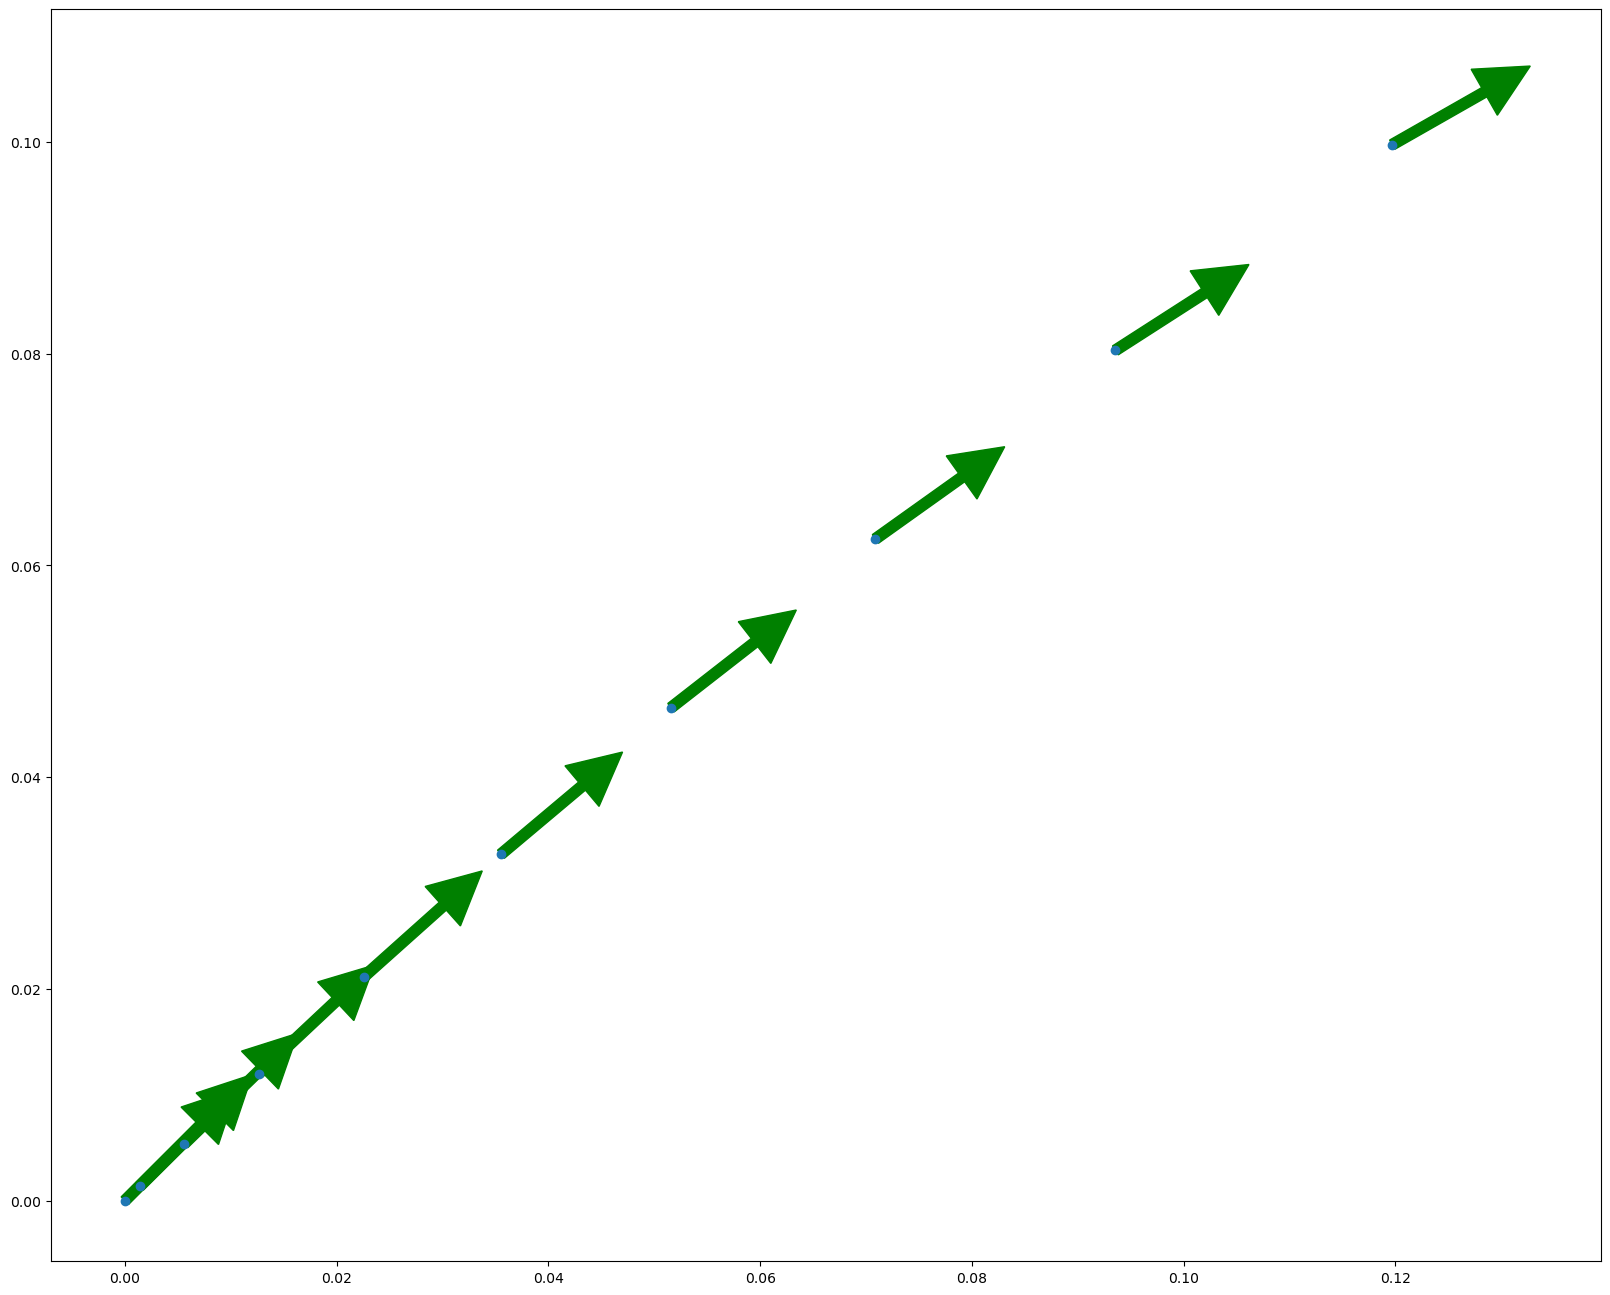

In [ ]:
N = 10
ns = 6
nu = 3
dt = 0.1

model = VesselModel()
Sfwd = np.zeros((N, ns))
Sfwd[0] = [0, 0, np.pi/4, 0, 0, 0]
U = np.tile([10, 0, 2], (N-1, 1))

for i in range(N-1):
    Sn = Sfwd[i]
    Un = U[i]

    Sfwd[i+1] = model.rk4(Sn, Un, dt)

ps = Sfwd.T
fig, axes = plt.subplots(1, 1, figsize=(20, 20))

for i in range(len(ps[1])):
    dx = 0.01*np.cos(ps[2,i])
    dy = 0.01*np.sin(ps[2,i])
    axes.arrow(ps[1,i], ps[0, i], dy, dx, head_width=0.005, head_length=0.005, fc='green', ec='green')

axes.scatter(ps[1], ps[0])
axes.set_aspect('equal', adjustable='box')
plt.show()